# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | goure
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | porto novo
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | toga village
City not found. Skipping...
Processing Record 11 of Set 1 | port isabel
Processing Record 12 of Set 1 | save
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | san antonio de pale
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,goure,13.9835,10.2704,31.96,36,100,2.56,NE,1689879763
1,blackmans bay,-43.0167,147.3167,4.74,89,12,2.75,AU,1689879763
2,bethel,41.3712,-73.4140,30.41,61,40,2.57,US,1689879764
3,port mathurin,-19.6833,63.4167,23.28,72,5,8.81,MU,1689879641
4,san patricio,28.0170,-97.5169,37.87,41,5,7.29,US,1689879765


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,goure,13.9835,10.2704,31.96,36,100,2.56,NE,1689879763
1,blackmans bay,-43.0167,147.3167,4.74,89,12,2.75,AU,1689879763
2,bethel,41.3712,-73.4140,30.41,61,40,2.57,US,1689879764
3,port mathurin,-19.6833,63.4167,23.28,72,5,8.81,MU,1689879641
4,san patricio,28.0170,-97.5169,37.87,41,5,7.29,US,1689879765


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

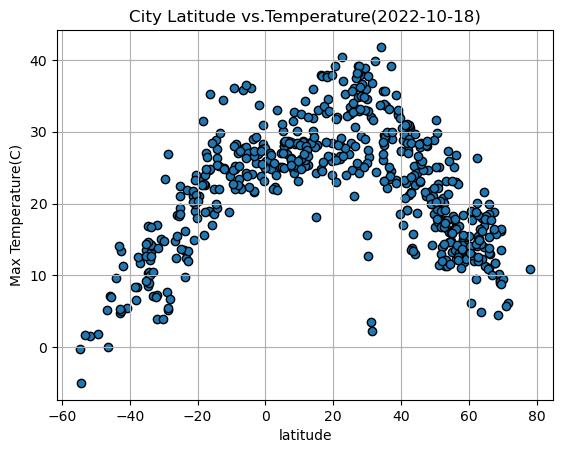

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

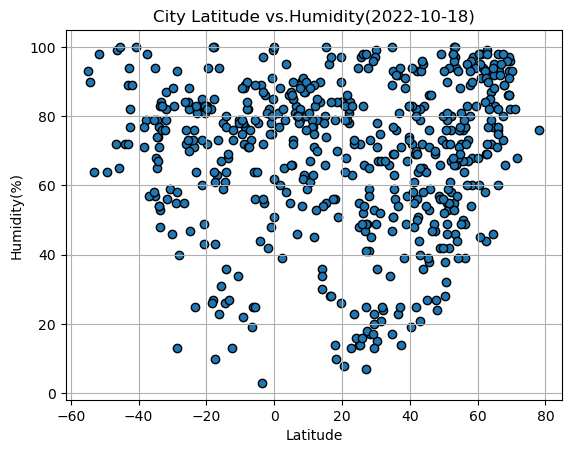

In [25]:
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

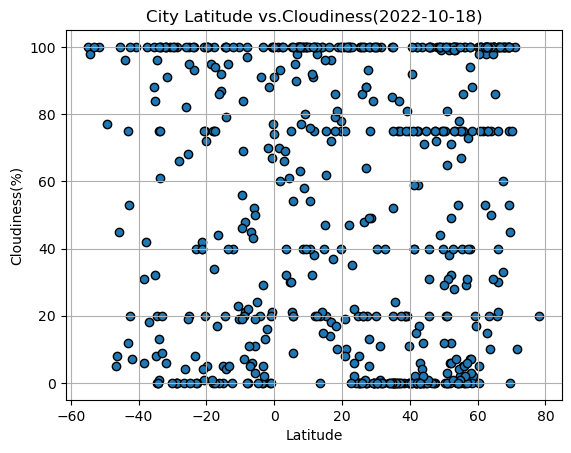

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

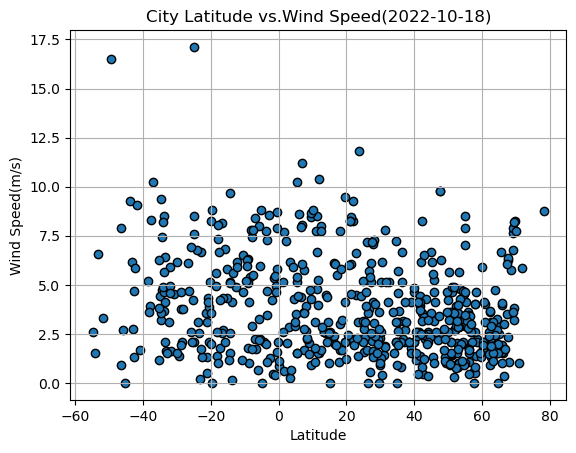

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,goure,13.9835,10.2704,31.96,36,100,2.56,NE,1689879763
2,bethel,41.3712,-73.4140,30.41,61,40,2.57,US,1689879764
4,san patricio,28.0170,-97.5169,37.87,41,5,7.29,US,1689879765
5,ribeira grande,38.5167,-28.7000,23.22,88,20,2.06,PT,1689879765
6,porto novo,6.4965,2.6036,26.90,83,90,4.38,BJ,1689879646


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,4.74,89,12,2.75,AU,1689879763
3,port mathurin,-19.6833,63.4167,23.28,72,5,8.81,MU,1689879641
7,adamstown,-25.0660,-130.1015,22.46,82,100,17.12,PN,1689879766
11,port-aux-francais,-49.3500,70.2167,1.84,64,77,16.50,TF,1689879769
12,port lincoln,-34.7333,135.8667,10.28,68,8,3.21,AU,1689879769


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.67


Text(0, 0.5, 'Temperature(C)')

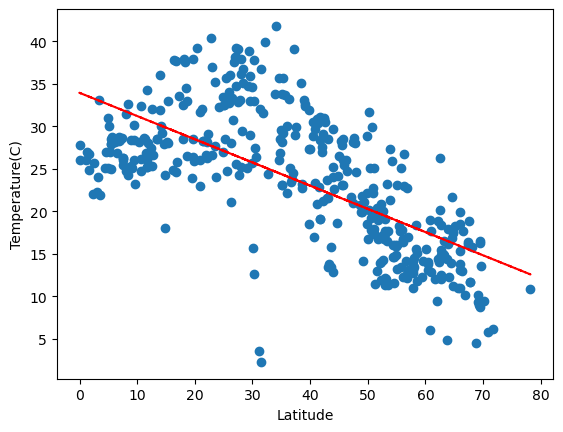

In [39]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value between Lat and Max Temp is 0.86


Text(0, 0.5, 'Temperature(C)')

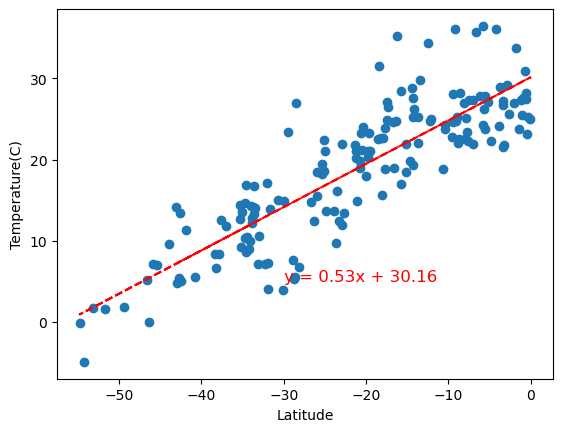

In [37]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

**Discussion about the linear relationship:** 
In the north hemisphere, the city latitude and temperature have a negative correlation which indicates the higher latitude of the city the lower the temperature. On the southern hwmisphere the higher latitude city the higher temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.16


Text(0, 0.5, 'Humidity(%)')

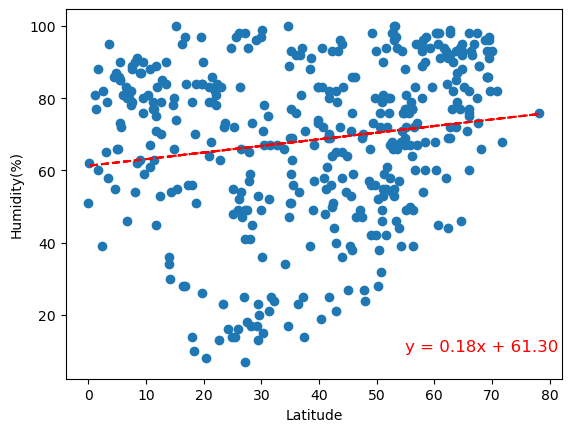

In [40]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is -0.15


Text(0, 0.5, 'Humidity(%)')

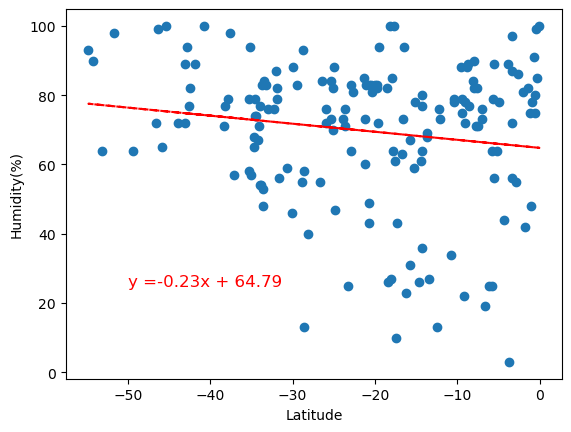

In [41]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** 
In the north hemisphere a city latitude have a weak correlation, which indicates that is less likely for th ehumidity to  increase if the latitude is higher. On the southern hemisphere the higher the latitude the lower humidity is likely to be beacuse of the -15 correlation 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is -0.03


Text(0, 0.5, 'Cloudiness(%)')

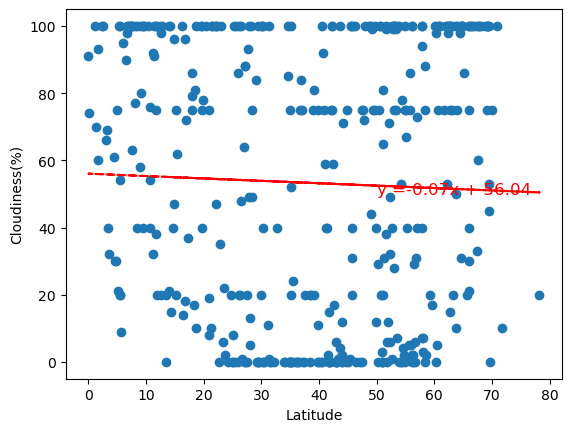

In [42]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is -0.18


Text(0, 0.5, 'Cloudiness(%)')

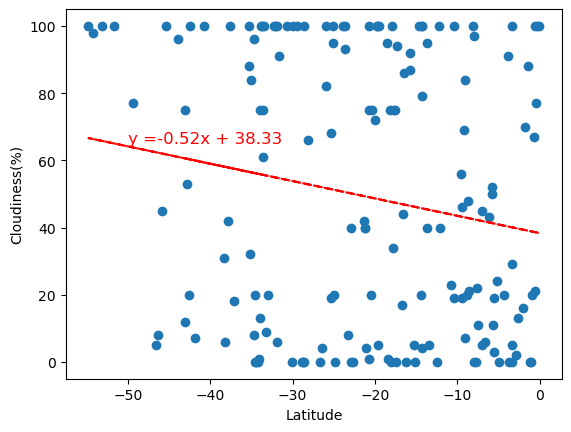

In [43]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** 
In the north hemisphere the latitude has almost nothig to do with the cloudniness of the city, with a -.03 correlation whte cloudiness wil be a little bit lower if the latitude is higher. In the south hemisphere it has a negative correlation  of -.18 which indicates is likely to be less cloudiness if the latitude is higher.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is -0.17


Text(0, 0.5, 'Wind Speed(m/s)')

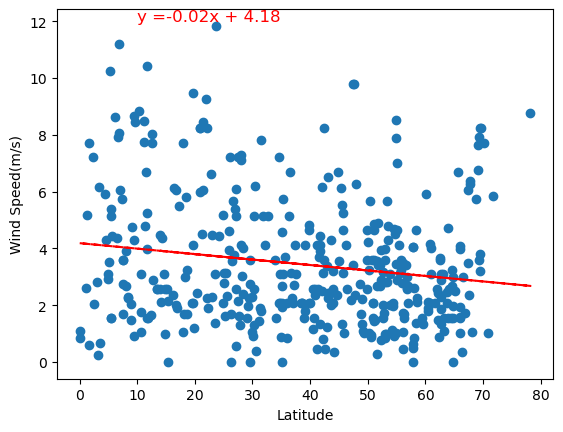

In [44]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.07


Text(0, 0.5, 'Wind Speed(m/s)')

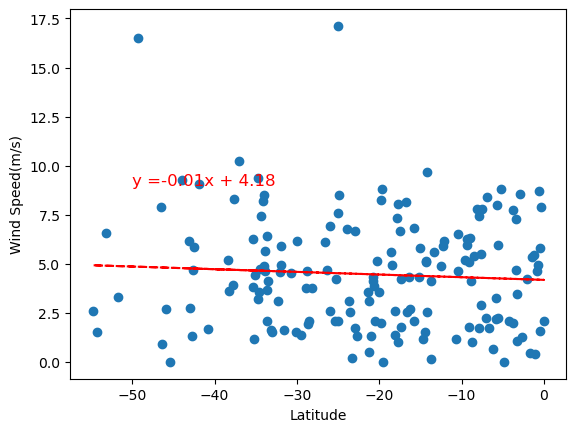

In [45]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** 
In the north hemisphere the correlation is -.17 which indicates a weka corrleation but the wind speed is kind of likely to be lower the higher the latitude of the city. In the south hemisphere a negative correlation of -.07 indicates there is almost no change in the wind speed the higher the latitude from a city is.